In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder


In [45]:
df = pd.read_csv('Student_Performance.csv')
print(df.head())
print(df.columns)
print(df.dtypes)

   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  
Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')
Hours Studied       

In [46]:
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_cols = pd.DataFrame(encoder.fit_transform(df[['Extracurricular Activities']]), columns=['Extracurricular Activities'])
df = pd.concat([df, encoded_cols], axis=1)
df = df.drop(columns=['Extracurricular Activities'])

print(df.isnull().sum())
print(df.describe())

Hours Studied                       0
Previous Scores                     0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64
       Hours Studied  Previous Scores   Sleep Hours  \
count   10000.000000     10000.000000  10000.000000   
mean        4.992900        69.445700      6.530600   
std         2.589309        17.343152      1.695863   
min         1.000000        40.000000      4.000000   
25%         3.000000        54.000000      5.000000   
50%         5.000000        69.000000      7.000000   
75%         7.000000        85.000000      8.000000   
max         9.000000        99.000000      9.000000   

       Sample Question Papers Practiced  Performance Index  
count                      10000.000000       10000.000000  
mean                           4.583300          55.224800  
std                            2.867348          19.212558  
min                            0.000000          10.00000

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [34]:
corr_matrix = df.corr()
print(corr_matrix)


                                  Hours Studied  Previous Scores  Sleep Hours  \
Hours Studied                          1.000000        -0.012390     0.001245   
Previous Scores                       -0.012390         1.000000     0.005944   
Sleep Hours                            0.001245         0.005944     1.000000   
Sample Question Papers Practiced       0.017463         0.007888     0.003990   
Performance Index                      0.373730         0.915189     0.048106   

                                  Sample Question Papers Practiced  \
Hours Studied                                             0.017463   
Previous Scores                                           0.007888   
Sleep Hours                                               0.003990   
Sample Question Papers Practiced                          1.000000   
Performance Index                                         0.043268   

                                  Performance Index  
Hours Studied                         

In [35]:
X = df[['Hours Studied']].values  
y = df['Performance Index'].values 

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [38]:
y_pred = model.predict(X_test)

In [39]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 321.8145383172104


In [40]:
plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

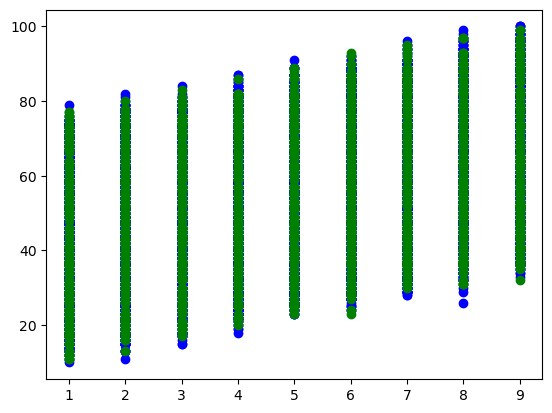

In [41]:
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='green', label='Testing data')

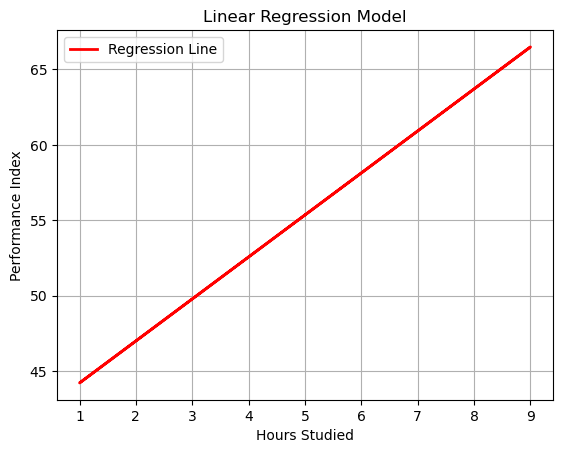

In [42]:
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')

plt.title('Linear Regression Model')
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.legend()
plt.grid(True)
plt.show()